In [1]:
# Pandas and numpy for data manipulat, on
import pandas as pd
import numpy as np
np.random.seed(42)

 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [81]:
#import pymc3 as pm

### Read data 

In [7]:
# Read in class scores
df = pd.read_csv('student-por.csv', sep=';')


In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [11]:
# Filter out grades that were 0 and 1 ou enlever les observations avec Grade 0 and 1
df = df[~df['G3'].isin([0, 1])] #to filter out values that are 0 and 1

df = df.rename(columns={'G3': 'Grade'}) 

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [12]:
df.info()    #357 rows  * 33  columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 648
Data columns (total 33 columns):
school        633 non-null object
sex           633 non-null object
age           633 non-null int64
address       633 non-null object
famsize       633 non-null object
Pstatus       633 non-null object
Medu          633 non-null int64
Fedu          633 non-null int64
Mjob          633 non-null object
Fjob          633 non-null object
reason        633 non-null object
guardian      633 non-null object
traveltime    633 non-null int64
studytime     633 non-null int64
failures      633 non-null int64
schoolsup     633 non-null object
famsup        633 non-null object
paid          633 non-null object
activities    633 non-null object
nursery       633 non-null object
higher        633 non-null object
internet      633 non-null object
romantic      633 non-null object
famrel        633 non-null int64
freetime      633 non-null int64
goout         633 non-null int64
Dalc          633 no

In [13]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,16.720379,2.519747,2.320695,1.563981,1.941548,0.206951,3.932070,3.169036,3.184834,1.489731,2.268562,3.527646,3.751975,11.503949,11.756714,12.205371
std,1.214044,1.133497,1.102284,0.750167,0.833284,0.579023,0.946411,1.047082,1.162014,0.912452,1.281776,1.448355,4.662003,2.682645,2.629715,2.656882
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,5.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,12.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [14]:
#633 students and 33 attributes 
df.shape

(633, 33)

In [15]:
#print the columns with the type being object
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df[col].value_counts())


Column Name: school
GP    421
MS    212
Name: school, dtype: int64

Column Name: sex
F    376
M    257
Name: sex, dtype: int64

Column Name: address
U    446
R    187
Name: address, dtype: int64

Column Name: famsize
GT3    443
LE3    190
Name: famsize, dtype: int64

Column Name: Pstatus
T    555
A     78
Name: Pstatus, dtype: int64

Column Name: Mjob
other       249
services    135
at_home     131
teacher      70
health       48
Name: Mjob, dtype: int64

Column Name: Fjob
other       359
services    175
at_home      41
teacher      35
health       23
Name: Fjob, dtype: int64

Column Name: reason
course        279
home          146
reputation    141
other          67
Name: reason, dtype: int64

Column Name: guardian
mother    444
father    149
other      40
Name: guardian, dtype: int64

Column Name: schoolsup
no     566
yes     67
Name: schoolsup, dtype: int64

Column Name: famsup
yes    393
no     240
Name: famsup, dtype: int64

Column Name: paid
no     595
yes     38
Name: paid, dty

In [16]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,16.720379,2.519747,2.320695,1.563981,1.941548,0.206951,3.932070,3.169036,3.184834,1.489731,2.268562,3.527646,3.751975,11.503949,11.756714,12.205371
std,1.214044,1.133497,1.102284,0.750167,0.833284,0.579023,0.946411,1.047082,1.162014,0.912452,1.281776,1.448355,4.662003,2.682645,2.629715,2.656882
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,5.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,12.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [17]:
df['Grade'].describe()

count    633.000000
mean      12.205371
std        2.656882
min        5.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: Grade, dtype: float64

In [18]:
#count of unique values
df['Grade'].value_counts().values

array([104,  97,  82,  72,  63,  49,  36,  35,  35,  29,  15,  10,   3,
         2,   1])

In [94]:
#unique values of grades
df['Grade'].value_counts().index

Int64Index([11, 10, 13, 12, 14, 15, 16, 9, 8, 17, 18, 7, 6, 19, 5], dtype='int64')

In [95]:
#The following is the plot of counts vs grades

([<matplotlib.axis.XTick at 0x7fecf92b4c50>,
 <a list of 19 Text xticklabel objects>)

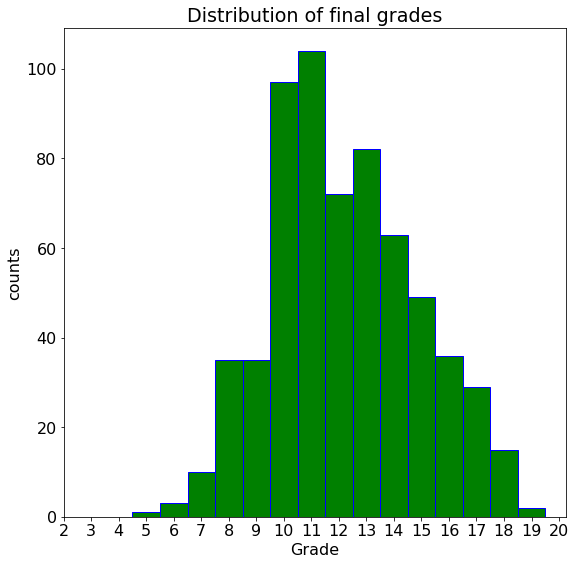

In [96]:
plt.bar(df['Grade'].value_counts().index ,
        df['Grade'].value_counts().values,
        width = 1 , color = 'green', edgecolor ='blue')
plt.xlabel('Grade');plt.ylabel('counts'); plt.title('Distribution of final grades');
plt.xticks(list(range(2, 21)))

In [97]:
#We noticed that grades are close to being normally distributed with the mode equal to 10
#Some students belonging to a certain category  may have skewed grades. Let's check it out 

In [98]:
#THe following helps when looking for skewness 

#The relevance of those plots are on the peaks and the skewness

(Text(0,0.5,'density'), Text(0.5,1,'Density of grades by guardian'))

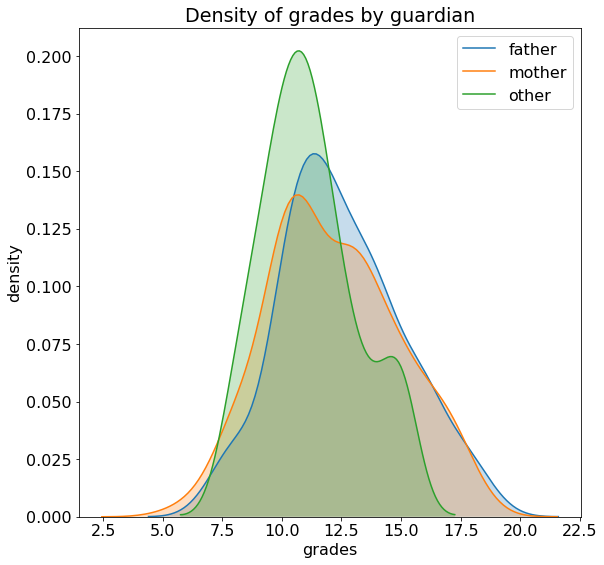

In [99]:
#Grades distribution by adress
sns.kdeplot(df.loc[df['guardian']=='father','Grade'], label = 'father' , shade = True)
sns.kdeplot(df.loc[df['guardian']=='mother','Grade'], label = 'mother' , shade = True)
sns.kdeplot(df.loc[df['guardian']=='other','Grade'], label = 'other' , shade = True)
plt.xlabel('grades');plt.ylabel('density'), plt.title('Density of grades by guardian')

(Text(0,0.5,'density'), Text(0.5,1,'Density of grades by address'))

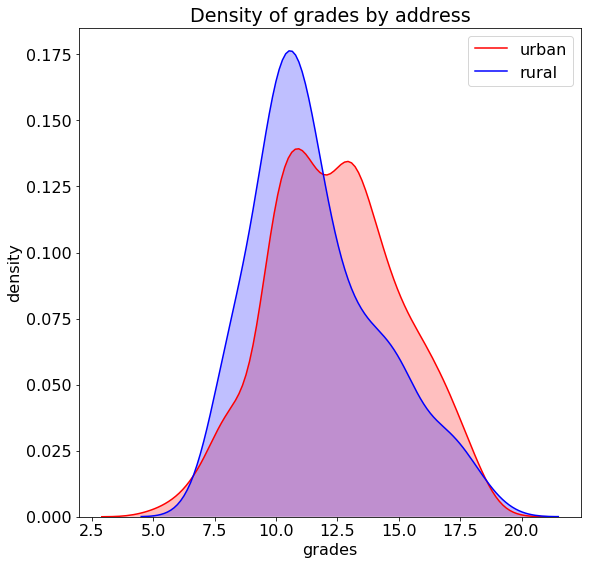

In [100]:
sns.kdeplot(df.loc[df['address']=='U' , 'Grade'] , label= 'urban' ,color = 'red', shade = True)
sns.kdeplot(df.loc[df['address']=='R' , 'Grade'] , label= 'rural' ,color = 'blue', shade = True)
plt.xlabel('grades');plt.ylabel('density'), plt.title('Density of grades by address')

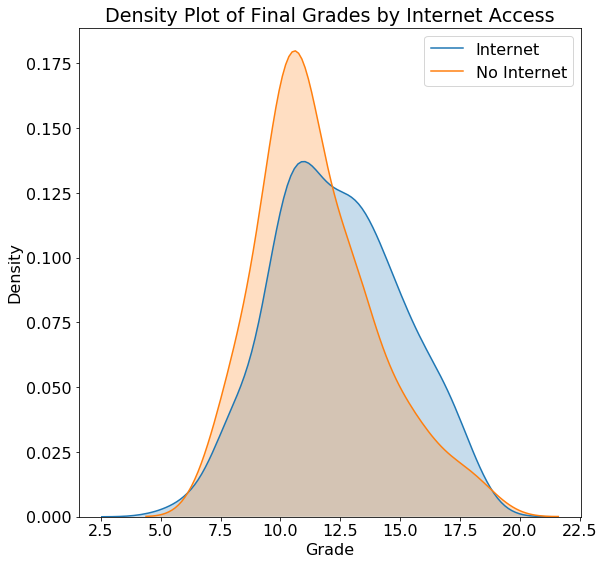

In [101]:

# Grade distribution by internet# Grade  
sns.kdeplot(df.loc[df['internet'] == 'yes', 'Grade'], label = 'Internet', shade = True)
sns.kdeplot(df.loc[df['internet'] == 'no', 'Grade'], label = 'No Internet', shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Internet Access');

In [102]:
#The different density plots are not very informative with regards to this situtation! 
#So, we may use the shapes {comparison of them, the peak, the tails}, the mixed-coloured zone to unleash some info

In [103]:
#Plots like above tell us if knowing some categorical variable could help predict the output. 

In [104]:
# Look at distribution of schools by address
schools = df.groupby(['school'])['address'].value_counts()
schools

school  address
GP      U          343
        R           78
MS      R          109
        U          103
Name: address, dtype: int64

Pour calculer le rang centile $R100(X)$ d’une donnée X d’une distribution statistique comprenant n données, il faut d’abord ordonner les valeurs de la distribution, puis trouver le nombre Di des données inférieures à X et le nombre De des données égales à X. On applique alors la formule suivante :


   $$ R_{100} = \frac{D_{i} * (0.5 * D_{e})}{n}$$

## Grades percentile

In [105]:
# Calculate percentile for grades
df['percentile'] = df['Grade'].apply(lambda x: percentileofscore(df['Grade'], x))

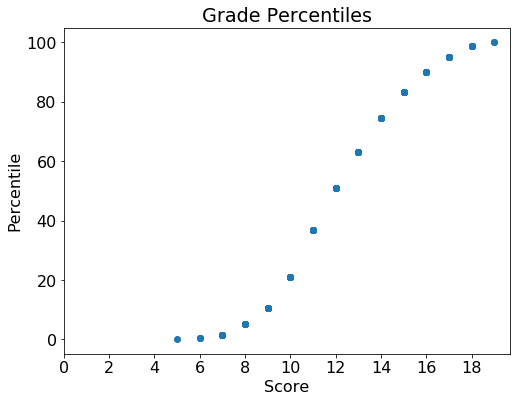

In [106]:
# Plot percentiles for grades
plt.figure(figsize = (8, 6))
plt.plot(df['Grade'], df['percentile'], 'o')
plt.xticks(range(0, 20, 2), range(0, 20, 2))
plt.xlabel('Score'); plt.ylabel('Percentile'); plt.title('Grade Percentiles');

In [107]:
print('50th percentile score:', np.min(df.loc[df['percentile'] > 50, 'Grade']))
print('Minimum Score needed for 90th percentile:', np.min(df.loc[df['percentile'] > 90, 'Grade']))

50th percentile score: 12
Minimum Score needed for 90th percentile: 17


## Variable Correlations with Final Grade

### Numerical Correlations

In [108]:
#To check the correlation of grades with other variables
#Correlations of numerical values
df.corr()['Grade'].sort_values()

failures     -0.384569
absences     -0.204230
Dalc         -0.196891
Walc         -0.178839
traveltime   -0.129654
goout        -0.111228
freetime     -0.105206
health       -0.096461
age          -0.042505
famrel        0.072888
Fedu          0.204392
studytime     0.249855
Medu          0.278690
G1            0.874777
G2            0.942691
percentile    0.985253
Grade         1.000000
Name: Grade, dtype: float64

### Categorical Correlations using One-Hot Encoding


In [109]:
#To litteraly turn the categorical variables into numerical ones 

In [110]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

In [111]:
pd.get_dummies(df['sex']).head(3)

,F,M
0,1,0
1,1,0
2,1,0


In [112]:
df['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

As we saw from the plots, we don’t expect every variable to be related to the final grade, so we need to perform feature selection (also called dimensionality reduction) to choose only the “relevant” variables. This depends on the problem, but because we will be doing linear modeling in this project, we can use a simple measure called the Correlation Coefficient to determine the most useful variables for predicting a grade. This is a value between -1 and +1 that measures the direction and strength of a linear relationship between two variables.

In [113]:
#One thing emerging here is the fact that for a single column with m unique values become a df with m columns

In [114]:
pd.get_dummies(df['Mjob']).head(3)

,at_home,health,other,services,teacher
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0


In [115]:

pd.get_dummies(df[['sex', 'nursery']]).head(3)

,sex_F,sex_M,nursery_no,nursery_yes
0,1,0,0,1
1,1,0,1,0
2,1,0,0,1


In [116]:
# Select only categorical variables
category_df = df.select_dtypes('object')
# One hot encode the variables
dummy_df = pd.get_dummies(category_df)
# Put the grade back in the dataframe
dummy_df['Grade'] = df['Grade']
dummy_df.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Grade
0,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,1,1,0,1,0,11
1,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,1,0,11
2,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,1,1,0,12
3,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,14
4,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,0,13


In [117]:
#The purpose of this is to check whether an unique value could have a correlation with the grades

In [118]:
# Correlations in one-hot encoded dataframe# Correl 
dummy_df.corr()['Grade'].sort_values()

higher_no           -0.343742
school_MS           -0.227632
Mjob_at_home        -0.158496
reason_course       -0.138195
internet_no         -0.131408
address_R           -0.128350
sex_M               -0.125755
guardian_other      -0.100802
schoolsup_yes       -0.098185
reason_other        -0.092382
activities_no       -0.078526
paid_yes            -0.067146
nursery_no          -0.056449
romantic_yes        -0.052050
Fjob_at_home        -0.049372
Fjob_services       -0.042497
Mjob_other          -0.035494
Fjob_other          -0.021292
famsize_GT3         -0.012957
guardian_mother     -0.008042
Pstatus_T           -0.001776
famsup_no           -0.001581
famsup_yes           0.001581
Pstatus_A            0.001776
Mjob_services        0.006210
famsize_LE3          0.012957
Fjob_health          0.026320
reason_home          0.046639
romantic_no          0.052050
nursery_yes          0.056449
guardian_father      0.066486
paid_no              0.067146
activities_yes       0.078526
Mjob_healt

### Select 5 Most Correlated Variables with Final Score

In [119]:
# Takes in a dataframe, finds the most correlated variables with the
# grade and returns training and testing datasets
def format_data(df):
    # Targets are final grade of student
    labels = df['Grade']
    
    # Drop the school and the grades from features
    df = df.drop(columns=['school', 'G1', 'G2', 'percentile'])
    
    # One-Hot Encoding of Categorical Variables
    df = pd.get_dummies(df)
    
    # Find correlations with the Grade
    #We use the absolute value to include the negative correlation which are substantially important in the
    #correlation process
    most_correlated = df.corr().abs()['Grade'].sort_values(ascending=False)
    
    # Maintain the top 5 most correlation features with Grade
    most_correlated = most_correlated[:8]
    
    df = df.loc[:, most_correlated.index]
    df = df.drop(columns = 'higher_no')
    
    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test

In [120]:
X_train, X_test, y_train, y_test = format_data(df)
X_train.head()

,Grade,failures,higher_yes,Medu,studytime,Fedu,absences
619,13,0,1,3,2,3,6
323,10,0,1,4,1,3,0
201,16,0,1,2,2,1,0
410,17,0,1,2,2,2,0
426,11,0,1,3,1,3,4


In [121]:
X_train.shape

(474, 7)

### Rename variables

In [122]:
# Rename variables in train and teste
X_train = X_train.rename(columns={'higher_yes': 'higher_edu', 
                                  'Medu': 'mother_edu',
                                  'Fedu': 'father_edu'
                                  })

X_test = X_test.rename(columns={'schoolsup_yes': 'higher_edu', 
                                  'Medu': 'mother_edu',
                                  'Fedu': 'father_edu'
                                })

In [123]:
X_train.head()

,Grade,failures,higher_edu,mother_edu,studytime,father_edu,absences
619,13,0,1,3,2,3,6
323,10,0,1,4,1,3,0
201,16,0,1,2,2,1,0
410,17,0,1,2,2,2,0
426,11,0,1,3,1,3,4


In [124]:
print(X_train.shape)
print(X_test.shape)

(474, 7)
(159, 7)


/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/site-packages/statsmodels/nonparametric/_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/site-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/site-packages/matplotlib/contour.py:1535: UserWarning: Warning: con

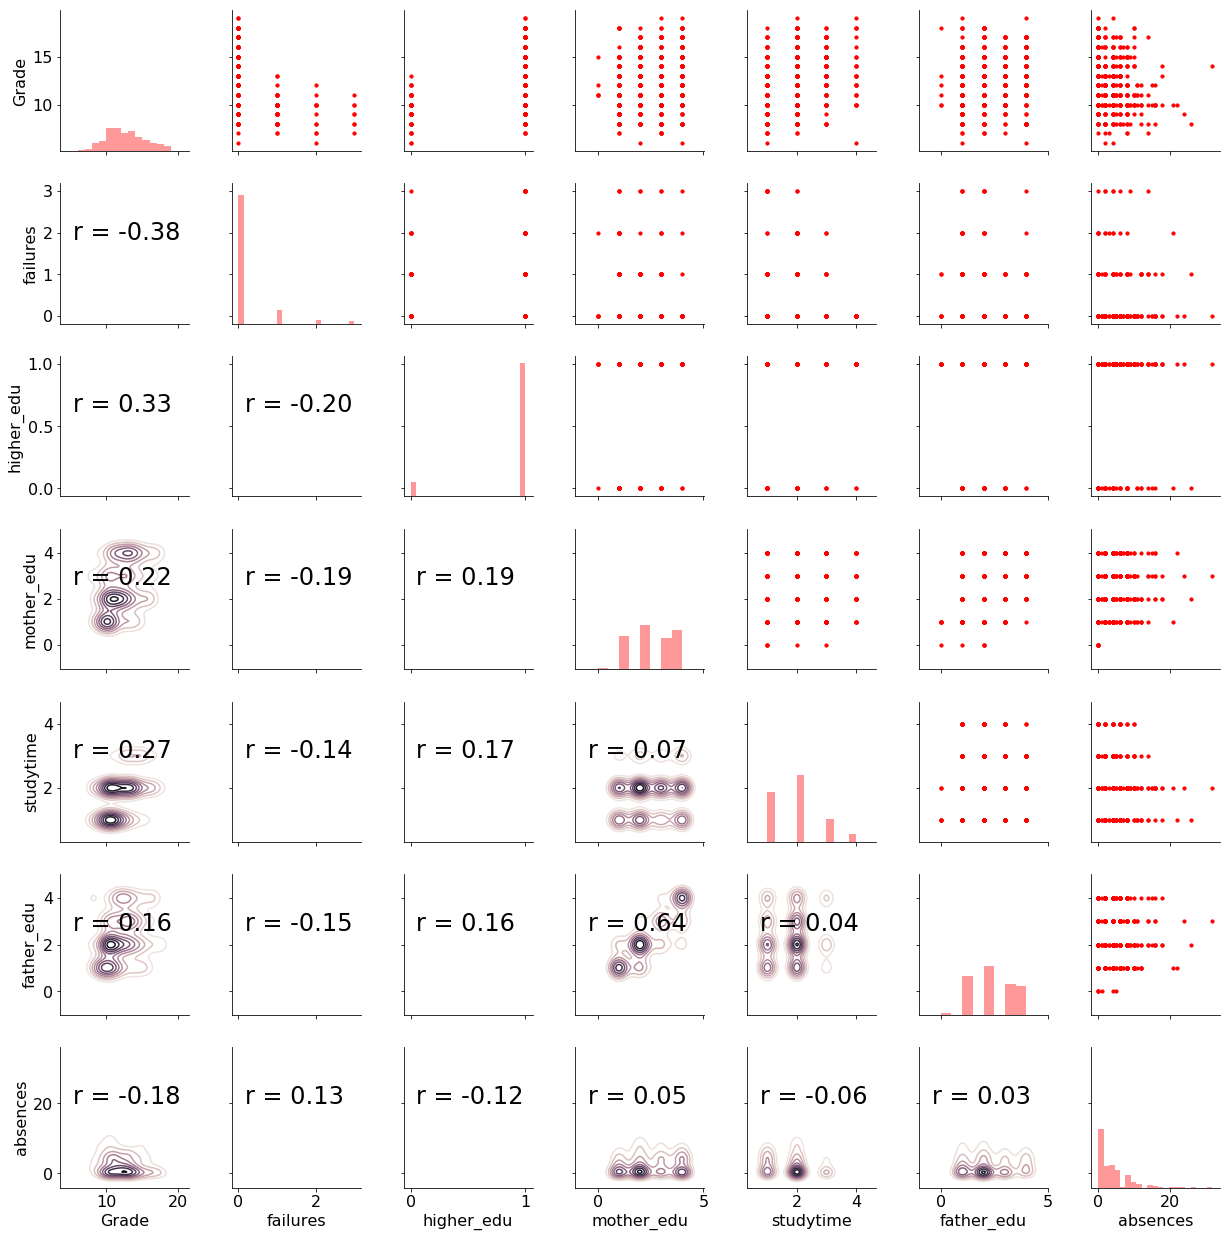

In [125]:
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(X_train)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [158]:
#study time vs absences
#The correlation is  -0.06 (not relevant). Most of the students allowing 2h of study time
#have generally 0 hour absence


In [127]:
# Create relation to the median grade column
#The median is supposed to divide the whole population into two pieces and take the value in the middle 
#In increasing or decreasing order
X_plot = X_train.copy()
X_plot['relation_median'] = (X_plot['Grade'] >= 12)  
X_plot['relation_median'] = X_plot['relation_median'].replace({True: 'above', False: 'below'})
X_plot = X_plot.drop(columns='Grade')

In [128]:
X_plot.head(4)

,failures,higher_edu,mother_edu,studytime,father_edu,absences,relation_median
619,0,1,3,2,3,6,above
323,0,1,4,1,3,0,below
201,0,1,2,2,1,0,above
410,0,1,2,2,2,0,above


In [214]:
X_plot.columns

Index(['failures', 'higher_edu', 'mother_edu', 'studytime', 'father_edu',
       'absences', 'relation_median'],
      dtype='object')

In [218]:
plotting.scatter_matrix?

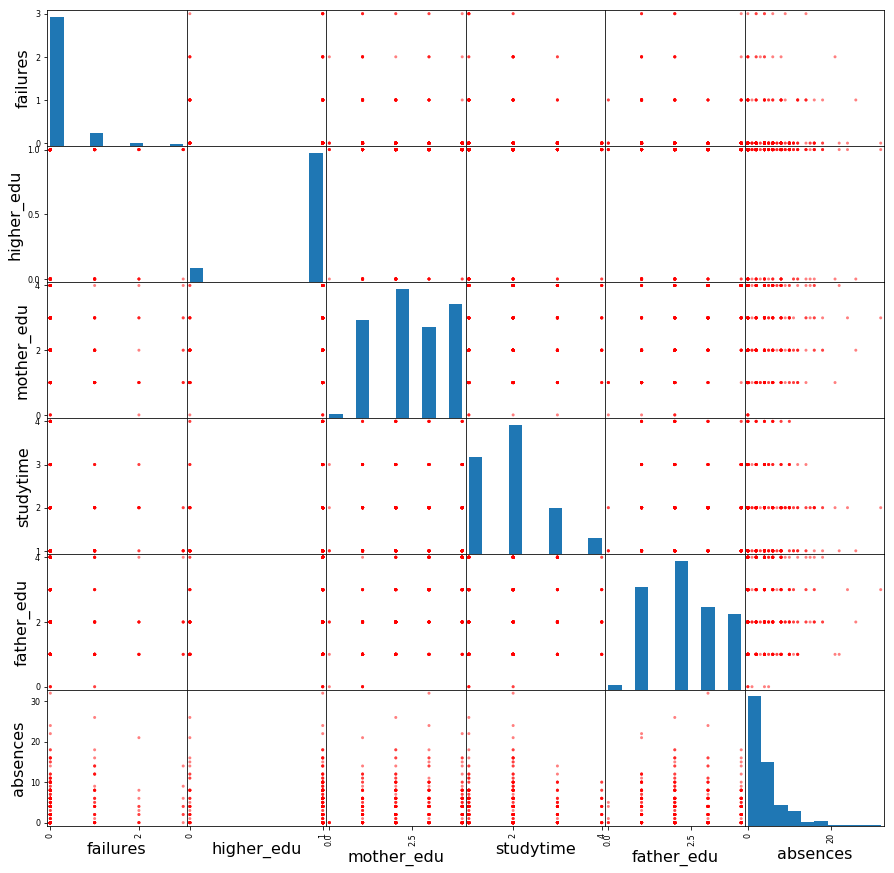

In [224]:
plotting.scatter_matrix(X_plot[['failures', 'higher_edu', 'mother_edu', 'studytime', 'father_edu',
       'absences', 'relation_median']], figsize=(15,15), color = 'red')
plt.show()

In [159]:
from pandas import plotting

**Andrews curves** allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series. 

By coloring these curves differently for each class it is possible to visualize **data clustering.**

**Curves belonging to samples of the same class will usually be closer together and form
larger structures.**
One  plot, corresponds to  one sample.
So, the equation:

$$\Large f(t) = \frac{X_{1}}{\sqrt{2}} +  X_{2}   \sin(t) + X_{3}   \cos(t) + X_{4}   \sin(2t) + X_{5}   \cos(2t)$$

where $X_{n}$ are represent each of the $n$ attributes 

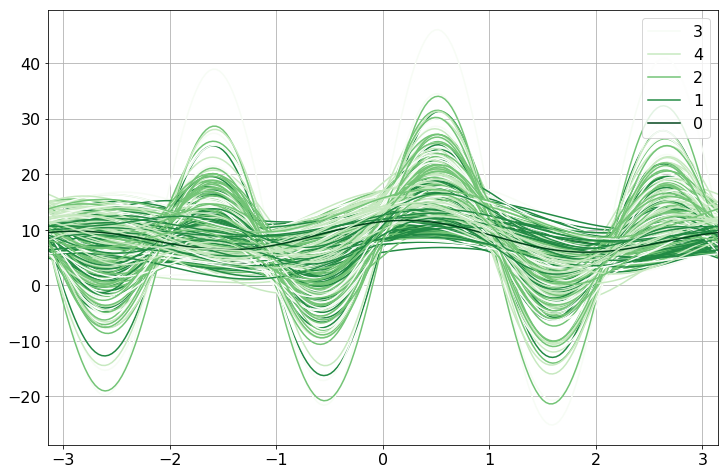

In [181]:
plotting.andrews_curves (X_train , 'mother_edu' , colormap=matplotlib.cm.Greens)


$\ast$ Outliers appear as single Andrews' curves that look different from the rest.

$\ast$ A subgroup of data is characterized by a set of simular curves.

$\ast$The order of the variables plays an important role for interpretation.


$\ast$ The order of variables may be optimized by Principal Component 
Analysis.

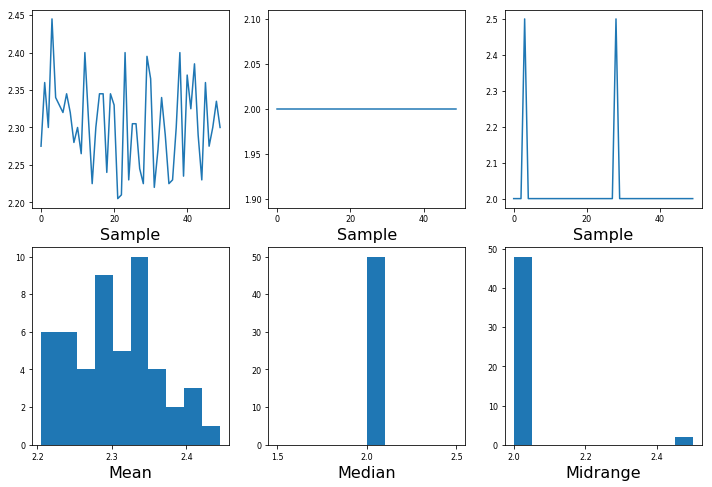

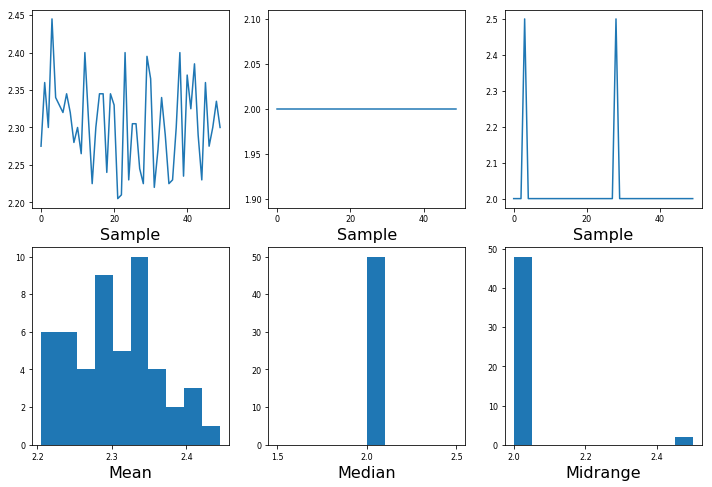

In [207]:
#plotting.bootstrap_plot(X_train['father_edu'], samples=50 , size= 200)
#plotting.bootstrap_plot?

In [172]:
X_train['absences'].unique()

array([ 6,  0,  4, 12,  2,  5,  7, 10, 16,  3,  8,  1,  9, 32, 11, 21, 15,
       14, 18, 24, 26, 22])

In [160]:
X_plot.columns

Index(['failures', 'higher_edu', 'mother_edu', 'studytime', 'father_edu',
       'absences', 'relation_median'],
      dtype='object')

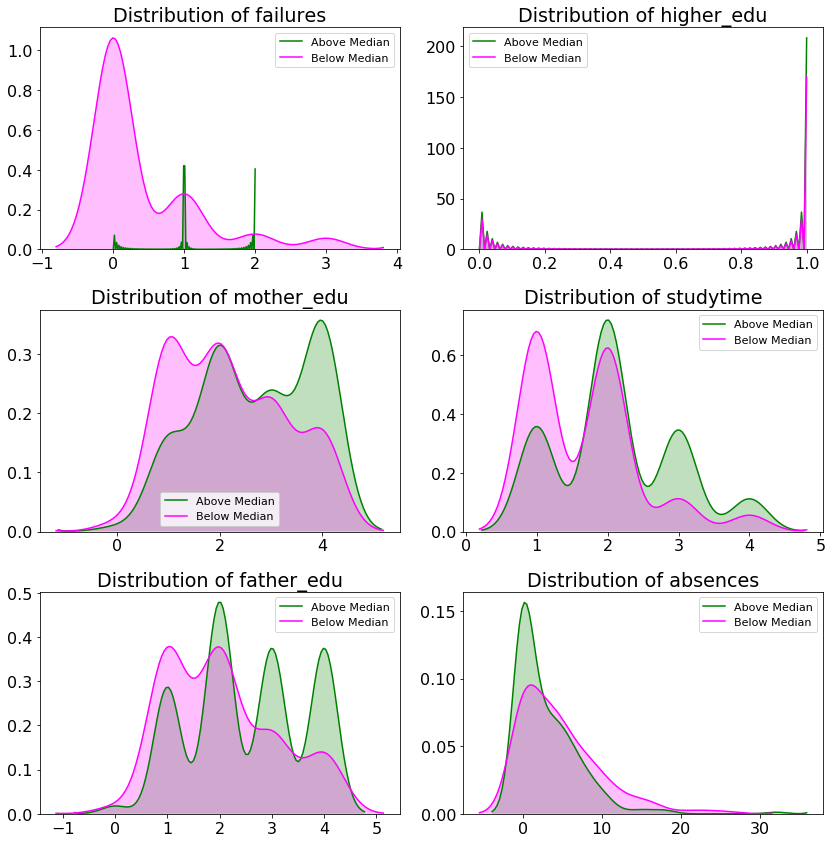

In [129]:
plt.figure(figsize=(12, 12))
# Plot the distribution of each variable colored
# by the relation to the median grade
for i, col in enumerate(X_plot.columns[:-1]):
    plt.subplot(3, 2, i + 1)
    subset_above = X_plot[X_plot['relation_median'] == 'above']
    subset_below = X_plot[X_plot['relation_median'] == 'below']
    sns.kdeplot(subset_above[col], label = 'Above Median', color = 'green' , shade=True)
    sns.kdeplot(subset_below[col], label = 'Below Median', color = 'magenta'  , shade=True)
    plt.legend(loc= 'best' ,fontsize = 'x-small' ); plt.title('Distribution of %s' % col)
    
plt.tight_layout()

For this regression task, we will use two standard metrics:

1. Mean Absolute Error (MAE): Average of the absolute value of the difference between predictions and the true values
2. Root Mean Squared Error (RMSE): The square root of the average of the squared differences between the predictions and the true values.

The mean absolute error is more interpretable, but the root mean squared error penalizes larger errors more heavily. Either one may be appropriate depending on the situation. Here is a discussion.

In [130]:

# Calculate mae and rmse# Calcul 
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

### Naive Baseline

For a regression task, a simple naive baseline is to guess the median value on the training set for all testing cases. If our machine learning model cannot better this simple baseline, then perhaps we should try a different approach!

In [131]:
# Naive baseline is the median# Naive  
median_pred = X_train['Grade'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['Grade']

In [132]:
#we purposely or naively predict for X_test  the median of the X_train 
#And we check the mean average error and the root mean square error
# Display the naive baseline metrics# Displa 
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 2.1761
Median Baseline RMSE: 2.6777


In [133]:
from sklearn.linear_model import SGDRegressor

In [134]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted','SGDRegressor', 'Baseline']
    X_train = X_train.drop(columns='Grade')
    X_test = X_test.drop(columns='Grade')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    model7 = SGDRegressor(max_iter=6)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6, model7]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [135]:
results = evaluate(X_train, X_test, y_train, y_test)
results


,mae,rmse
Linear Regression,1.8859,2.27395
ElasticNet Regression,2.09282,2.53656
Random Forest,1.85529,2.32467
Extra Trees,1.97657,2.4871
SVM,1.90262,2.30825
Gradient Boosted,1.81272,2.22737
SGDRegressor,2.19541,2.69344
Baseline,2.1761,2.67765


In [136]:
results.style.apply(lambda x: ['background : lightgreen' if x.name == 'Baseline' else '' for i in x],axis=1)

,mae,rmse
Linear Regression,1.8859,2.27395
ElasticNet Regression,2.09282,2.53656
Random Forest,1.85529,2.32467
Extra Trees,1.97657,2.4871
SVM,1.90262,2.30825
Gradient Boosted,1.81272,2.22737
SGDRegressor,2.19541,2.69344
Baseline,2.1761,2.67765


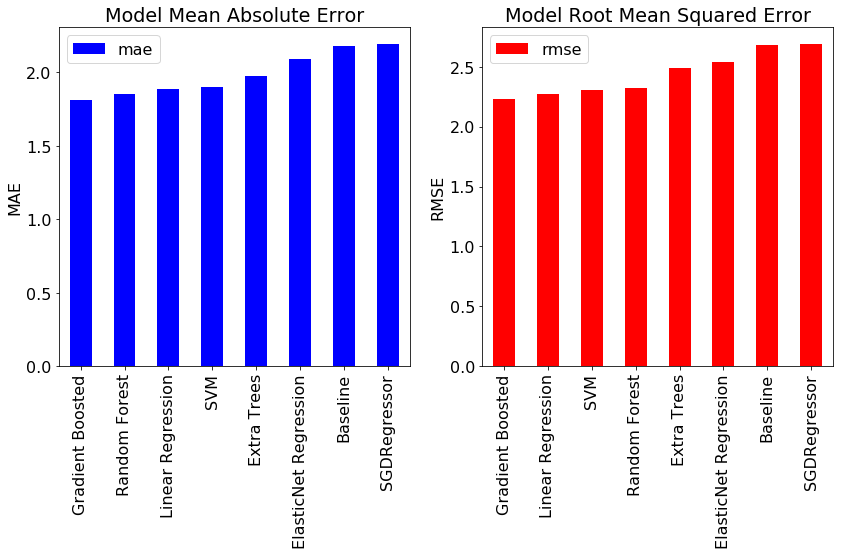

In [137]:
figsize(12, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [138]:
results.style.apply(lambda x: ['background : lightgreen' if x.name == 'Baseline' else '' for i in x],axis=1)

,mae,rmse
Linear Regression,1.8859,2.27395
ElasticNet Regression,2.09282,2.53656
Random Forest,1.85529,2.32467
Extra Trees,1.97657,2.4871
SVM,1.90262,2.30825
Gradient Boosted,1.81272,2.22737
SGDRegressor,2.19541,2.69344
Baseline,2.1761,2.67765


In [139]:
results

,mae,rmse
Linear Regression,1.8859,2.27395
ElasticNet Regression,2.09282,2.53656
Random Forest,1.85529,2.32467
Extra Trees,1.97657,2.4871
SVM,1.90262,2.30825
Gradient Boosted,1.81272,2.22737
SGDRegressor,2.19541,2.69344
Baseline,2.1761,2.67765


In [140]:
import numpy as np

In [141]:
results[results['mae']==np.min(results['mae'])]

,mae,rmse
Gradient Boosted,1.81272,2.22737


In [142]:
print('The Gradient Boosted regressor is {:0.2f}% better than the baseline.'.format(
    (100 * abs(results.loc['Gradient Boosted', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))

The Gradient Boosted regressor is 16.70% better than the baseline.


### From Ordinary least  square regression

In [146]:
print ('I am a {:0.0f} years old man.'.format(2018 - 1993))

I am a 25 years old man.


In [225]:
import statsmodels

In [274]:
from statsmodels.formula.api import OLS, ols


In [253]:
X_train.corr().abs()['Grade'].sort_values(ascending = False)

Grade         1.000000
failures      0.381132
higher_edu    0.330088
studytime     0.274820
mother_edu    0.220186
absences      0.182070
father_edu    0.163522
Name: Grade, dtype: float64

In [254]:
#The higher_edu (positive) and failures (negative) variable seems to have a higher correlation with grade than the others
#Let's build a ordinary least square to build the linear relationship with those two variable as explanatory and 
#Grade as depedant variable

In [255]:
#Eacch explanatory separately
mod_failure =  ols('Grade ~ failures' , X_train).fit()
mod_high =  ols('Grade ~ higher_edu' , X_train).fit()

In [256]:
mod_failure.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Grade   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     80.22
Date:                Sat, 05 May 2018   Prob (F-statistic):           7.78e-18
Time:                        14:54:26   Log-Likelihood:                -1097.2
No. Observations:                 474   AIC:                             2198.
Df Residuals:                     472   BIC:                             2207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5608      0.119    105.275      0.000      12.326      12.795
failures      -1.8223      0.203     -8.956      0.000      -2.222      -1.422
==============================================================================
Omnibus:                       12.334   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.831
Skew:                           0.304   Prob(JB):                      0.00445
Kurtosis:                       2.577   Cond. No.                         1.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The linear relationship between failures and Grades consist on the equation below



$$ \Large \textbf{Grades =   - 1.8223 * failure  +  12.5608} $$

In [257]:
mod_high.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Grade   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     57.72
Date:                Sat, 05 May 2018   Prob (F-statistic):           1.64e-13
Time:                        14:57:14   Log-Likelihood:                -1107.1
No. Observations:                 474   AIC:                             2218.
Df Residuals:                     472   BIC:                             2226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5435      0.370     25.828      0.000       8.817      10.270
higher_edu     2.9542      0.389      7.597      0.000       2.190       3.718
==============================================================================
Omnibus:                       11.734   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.387
Skew:                           0.255   Prob(JB):                      0.00916
Kurtosis:                       2.537   Cond. No.                         6.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The linear relationship between higher_edu and Grades consist on the equation below



$$ \Large \textbf{Grades =   9.5435 * higher_edu  +  2.9542} $$

In [259]:
# The two variables altoghether
mod_high_fail  = OLS(X_train['Grade'], X_train[['failures', 'higher_edu']]).fit()

In [260]:
mod_high_fail.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Grade   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     2205.
Date:                Sat, 05 May 2018   Prob (F-statistic):          3.33e-240
Time:                        15:03:40   Log-Likelihood:                -1315.8
No. Observations:                 474   AIC:                             2636.
Df Residuals:                     472   BIC:                             2644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
failures       0.0568      0.315      0.180      0.857      -0.563       0.676
higher_edu    12.4888      0.195     64.196      0.000      12.107      12.871
==============================================================================
Omnibus:                       64.734   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.010
Skew:                           1.000   Prob(JB):                     7.74e-20
Kurtosis:                       3.673   Cond. No.                         1.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The linear relationship between failures, higher_edu and Grades consist on the equation below



$$ \Large \textbf{Grades =   12.4888 * higher_edu  +  0.0568 * failures} $$

In [264]:
model_general  = OLS(X_train['Grade'], X_train[['failures', 'higher_edu', 'mother_edu', 
                                          'studytime', 'father_edu','absences']]).fit()

In [319]:
model_general.params

failures     -0.133974
higher_edu    6.132250
mother_edu    0.690901
studytime     1.661703
father_edu    0.508993
absences      0.033476
dtype: float64

In [322]:
#Using ols without intercept terms

In [323]:
statement = 'Grade =  '
for i , j in enumerate(X_train.columns[1:]):
    statement += '%0.2f * %s + ' %(model_general.params[i] ,j)

In [324]:
statement

'Grade =  -0.13 * failures + 6.13 * higher_edu + 0.69 * mother_edu + 1.66 * studytime + 0.51 * father_edu + 0.03 * absences + '

In [325]:
#Using Linear regression with intercept terms

In [326]:
lr = LinearRegression()
lr.fit(X_train.drop(columns='Grade'), y_train)

ols_formula = 'Grade = %0.2f +' % lr.intercept_
for i, col in enumerate(X_train.columns[1:]):
    ols_formula += ' %0.2f * %s +' % (lr.coef_[i], col)
    
' '.join(ols_formula.split(' ')[:-1])

'Grade = 9.19 + -1.32 * failures + 1.86 * higher_edu + 0.26 * mother_edu + 0.58 * studytime + 0.03 * father_edu + -0.07 * absences'

### From Bayesian Linear Regression

In [345]:
# Formula for Bayesian Linear Regression (follows R formula syntax
formula = 'Grade ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'Grade ~ failures + higher_edu + mother_edu + studytime + father_edu + absences'